Trabalho 1

O estudo aqui proposto pode ser encontrado em https://github.com/ViniciusCMB/Metodos_Num.git


Bibliotecas

In [229]:
import numpy as np
import matplotlib.pyplot as plt

$\dot g = 13.1*g - 13,94*g²$ 

$\dot f = 1.71 * g$ 

Sistema de equações

In [230]:
def sistema(x, t):
        f1, f2 = x
        dx1dt = 13.1*f1 - 13.94*(f1**2)
        dx2dt = 1.71*f1
        return np.array([dx1dt, dx2dt])

Função para solucionar EDO usando Runge-Kutta clássico de 4ª ordem

In [231]:
def rk4(f, x0, t):
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):  
        dt = t[i] - t[i-1]
        k1 = f(x[i-1], t[i-1])
        k2 = f(x[i-1] + 0.5*dt*k1, t[i-1] + 0.5*dt)
        k3 = f(x[i-1] + 0.5*dt*k2, t[i-1] + 0.5*dt)
        k4 = f(x[i-1] + dt*k3, t[i])
        x[i] = x[i-1] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return x

Condições iniciais:

In [232]:
G_ini = 0.03 
F_ini = 0 

x0 = [G_ini, F_ini] # vetor de condições iniciais

ts = 1 # tempo de simulação em segundos
dt = 0.05 # passo de tempo
t = np.arange(0, ts+dt, dt) # vetor de tempo

Obtem a solução:

In [233]:
solucao = rk4(sistema, x0, t)

solucao

array([[0.03      , 0.        ],
       [0.0560719 , 0.00356722],
       [0.10226165, 0.0101539 ],
       [0.17881616, 0.02191602],
       [0.29267641, 0.04180476],
       [0.43738777, 0.07286383],
       [0.58857636, 0.11679015],
       [0.71737472, 0.17285811],
       [0.80935935, 0.2384019 ],
       [0.86711749, 0.31029131],
       [0.90051646, 0.38600195],
       [0.91891989, 0.46386783],
       [0.92879248, 0.54290474],
       [0.93401279, 0.62256509],
       [0.93675209, 0.70255376],
       [0.93818375, 0.78271435],
       [0.93893042, 0.86296468],
       [0.9393194 , 0.94326179],
       [0.93952194, 1.02358326],
       [0.93962736, 1.10391742],
       [0.93968222, 1.18425817]])

Plota o resultado:

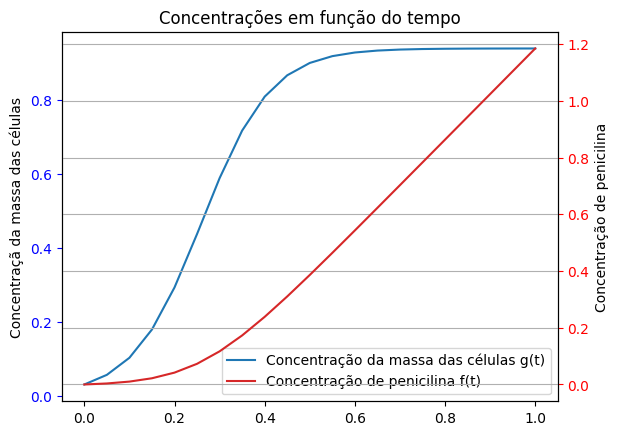

In [234]:
fig, ax = plt.subplots()
ax2 = ax.twinx() 

plotC = ax.plot(t, solucao[:, 0],label='Concentração da massa das células g(t)', color='tab:blue') # plota o gráfico da concentração
plotF = ax2.plot(t, solucao[:, 1], label='Concentração de penicilina f(t)', color='tab:red') # plota o gráfico da temperatura

ax.set_ylabel('Concentraçã da massa das células')
ax.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Concentração de penicilina')
ax2.tick_params(axis='y', colors='red')
plt.xlabel('Tempo [s]')
titulo = 'Concentrações em função do tempo'
plt.title(titulo)
plt.grid()
ax.legend(handles=[plotC[0], plotF[0]])
plt.show()

Validando o resultado:

Pacotes conhecidos do python como o sympy.solve_ivp utilizando o Método Runge-Kutta explícito de ordem 5

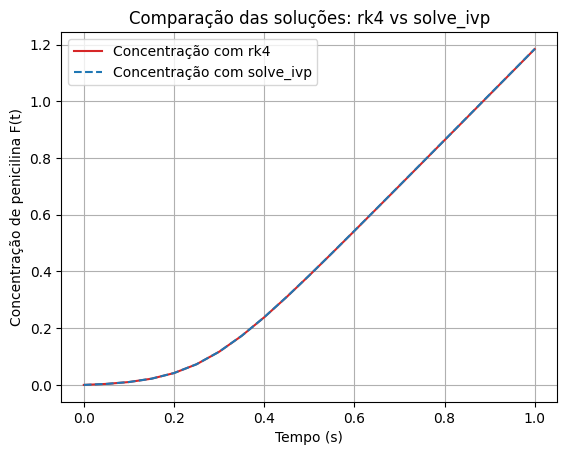

In [235]:
from scipy.integrate import solve_ivp

def sistema_ivp(t, x):
    f1, f2 = x
    dx1dt = 13.1*f1 - 13.94*(f1**2)
    dx2dt = 1.71*f1
    return [dx1dt, dx2dt]

sol_ivp = solve_ivp(sistema_ivp, [0, 1], x0, t_eval=t)

plt.plot(t, solucao[:, 1], label='Concentração com rk4', color='tab:red')
plt.plot(sol_ivp.t, sol_ivp.y[1], '--', label='Concentração com solve_ivp', color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Concentração de penicilina F(t)')
titulo = 'Comparação das soluções: rk4 vs solve_ivp'
plt.title(titulo)
plt.grid()
plt.legend()
plt.show()

Comparando os passos de tempo para solução:

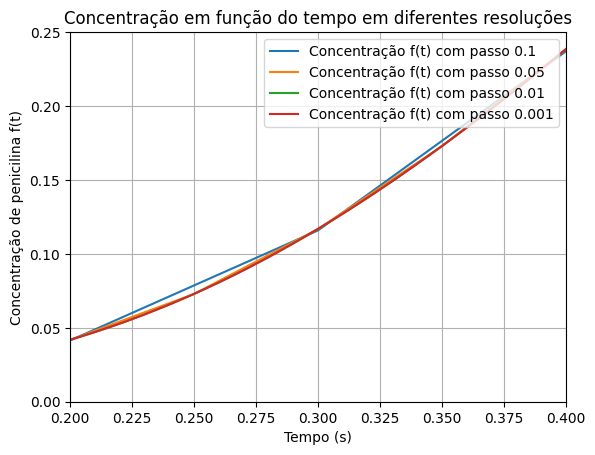

In [236]:
G_ini = 0.03
F_ini = 0

x0 = [G_ini, F_ini]

dt_values = [0.1, 0.05, 0.01, 0.001]
t = [np.arange(0, ts+dt, dt) for dt in dt_values]

solucao = [rk4(sistema, x0, tempo) for tempo in t]

for tempo, sol in zip(t, solucao):
    plt.plot(tempo, sol[:, 1], label=f'Concentração f(t) com passo {tempo[-1]/(len(tempo)-1)}')

titulo = 'Concentração em função do tempo em diferentes resoluções'
plt.title(titulo)
plt.xlim(0.2, 0.4)
plt.ylim(0, 0.25)
plt.xlabel('Tempo (s)')
plt.ylabel('Concentração de penicilina f(t)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

_Se não é possível visualizar a linha verde (passo 0.01), significa que a linha vermelha (passo 0.001) a sobrepõe perfeitamente, logo a resolução de 0.01 converge com menor custo computacional_

O mesmo para a g(t):

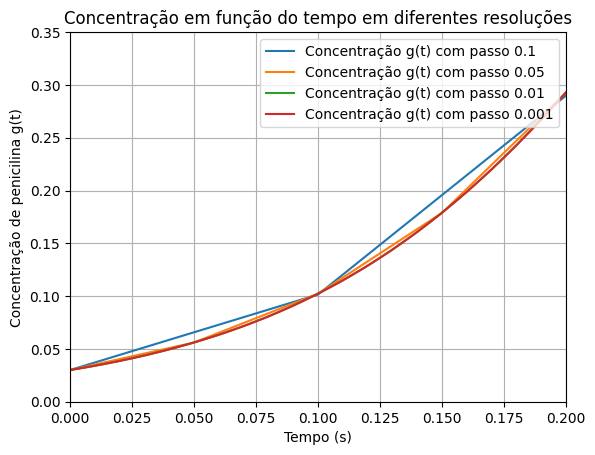

In [237]:
G_ini = 0.03
F_ini = 0

x0 = [G_ini, F_ini]

dt_values = [0.1, 0.05, 0.01, 0.001]
t = [np.arange(0, ts+dt, dt) for dt in dt_values]

solucao = [rk4(sistema, x0, tempo) for tempo in t]

for tempo, sol in zip(t, solucao):
    plt.plot(tempo, sol[:, 0], label=f'Concentração g(t) com passo {tempo[-1]/(len(tempo)-1)}')

titulo = 'Concentração em função do tempo em diferentes resoluções'
plt.title(titulo)
plt.xlabel('Tempo (s)')
plt.ylabel('Concentração de penicilina g(t)')
plt.xlim(0, 0.2)
plt.ylim(0, 0.35)
plt.legend(loc='upper right')
plt.grid()
plt.show()

_Similar ao anterior, se não é possível visualizar a linha verde (passo 0.01), significa que a linha vermelha (passo 0.001) a sobrepõe perfeitamente, logo a resolução de 0.01 converge com menor custo computacional_

Plotando diferentes condições iniciais

Comparando variações nas condições iniciais de concentração de massa:

Máximo g=0.9397 em t=1.00
Máximo g=0.9397 em t=1.00
Máximo g=0.9397 em t=1.00
Máximo g=0.9397 em t=1.00
Média dos últimos valores: 0.9397
Média dos máximos valores: 0.9397, desvio padrão: 0.00


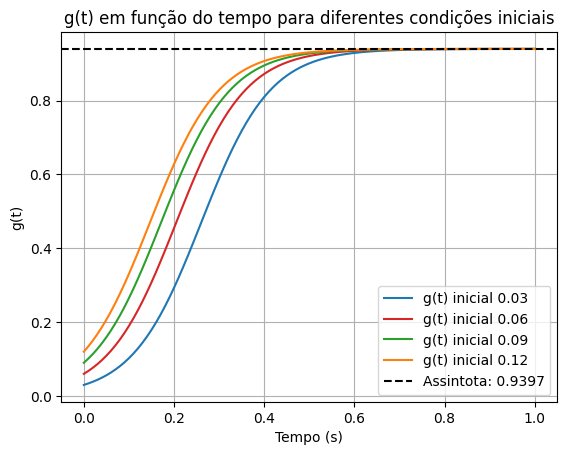

In [238]:
G_ini = np.linspace(0.03, 0.12, 4)
F_ini = 0

x0 = [G_ini, F_ini]

ts = 1 
dt = 0.01 
t = np.arange(0, ts+dt, dt)

solucao = np.array([rk4(sistema, [g, F_ini], t) for g in G_ini])

fig, ax = plt.subplots()

plotT = []
cor = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown']

for i, T in enumerate(G_ini):
    plotT.append(ax.plot(t, solucao[i][:, 0], label=f'g(t) inicial {T:.2f}', color=cor[i % len(cor)]))

ax.set_ylabel('g(t)')
plt.xlabel('Tempo (s)')
titulo = 'g(t) em função do tempo para diferentes condições iniciais'
plt.title(titulo)
plt.grid()

media_finais = round(np.mean(solucao[:, -1, 0]), 4)
ax.axhline(media_finais, color='black', linestyle='--', label=f'Assintota: {media_finais:.4f}')

valores_maximos = np.max(solucao[:, :, 0], axis=1)
tempos_maximos = t[np.argmax(solucao[:, :, 0], axis=1)]
desvio_padrao = np.std(valores_maximos)

for i, T in enumerate(G_ini):
    print(f'Máximo g={valores_maximos[i]:.4f} em t={tempos_maximos[i]:.2f}')

print(f'Média dos últimos valores: {media_finais:.4f}')
print(f'Média dos máximos valores: {np.mean(valores_maximos):.4f}, desvio padrão: {desvio_padrao:.2f}')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

_Percebe-se a ocorrência de uma assintota final independente da condição inicial_

Similar para a concentração de penicilina:

Máximo f=1.1844 em t=1.00
Máximo f=1.2511 em t=1.00
Máximo f=1.3178 em t=1.00
Máximo f=1.3844 em t=1.00


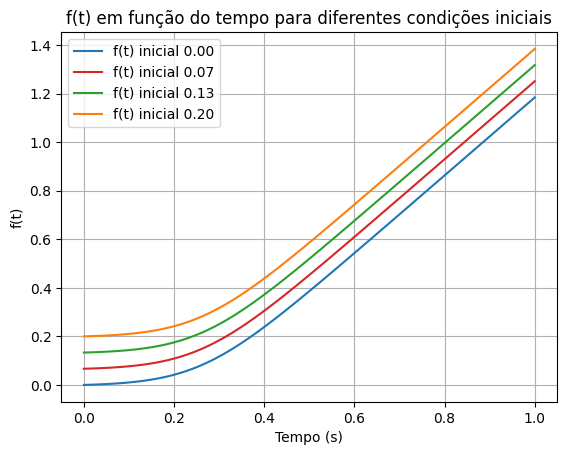

In [239]:
G_ini = 0.03
F_ini = np.linspace(0, 0.2, 4)

x0 = [G_ini, F_ini]

ts = 1
dt = 0.01
t = np.arange(0, ts+dt, dt)

solucao = np.array([rk4(sistema, [G_ini, f], t) for f in F_ini])

fig, ax = plt.subplots()
plotT = []
cor = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown']
for i, F in enumerate(F_ini):
    plotT.append(ax.plot(t, solucao[i][:, 1], label=f'f(t) inicial {F:.2f}', color=cor[i % len(cor)]))

ax.set_ylabel('f(t)')
plt.xlabel('Tempo (s)')
titulo = 'f(t) em função do tempo para diferentes condições iniciais'
plt.title(titulo)
plt.grid()

valores_maximos = np.max(solucao[:, :, 1], axis=1)
tempos_maximos = t[np.argmax(solucao[:, :, 1], axis=1)]

desvio_padrao = np.std(valores_maximos)
for i, F in enumerate(F_ini):
    print(f'Máximo f={valores_maximos[i]:.4f} em t={tempos_maximos[i]:.2f}')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

_A mudança da condição inicial apenas move a curva ao longo do eixo y_